In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv("data/Iris.csv")

print(data.info())

data = data.drop(["Id"], axis=1)

Q1 = data["SepalWidthCm"].quantile(0.25)
Q3 = data["SepalWidthCm"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["SepalWidthCm"] < lower_bound) | (data["SepalWidthCm"] > upper_bound)]
print(f"Outliers: {outliers}")

data = data[(data["SepalWidthCm"] >= lower_bound) & (data["SepalWidthCm"] <= upper_bound)].copy()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Outliers:     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
15            5.7           4.4            1.5           0.4      Iris-setosa
32            5.2           4.1            1.5           0.1      Iris-setosa
33            5.5           4.2            1.4           0.2      Iris-setosa
60            5.0           2.0            3.5           1.0  Iris-versicolor


(146, 5)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, matthews_corrcoef, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [5]:
X = data.copy()
X = X.drop(columns=["Species"])
y = data["Species"]

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

print("X train", X_train)

print("y train", y_train)

print("X test", X_test)

print("y test", y_test)


X train      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
131            7.9           3.8            6.4           2.0
135            7.7           3.0            6.1           2.3
101            5.8           2.7            5.1           1.9
88             5.6           3.0            4.1           1.3
6              4.6           3.4            1.4           0.3
..             ...           ...            ...           ...
129            7.2           3.0            5.8           1.6
59             5.2           2.7            3.9           1.4
149            5.9           3.0            5.1           1.8
96             5.7           2.9            4.2           1.3
130            7.4           2.8            6.1           1.9

[116 rows x 4 columns]
y train 131     Iris-virginica
135     Iris-virginica
101     Iris-virginica
88     Iris-versicolor
6          Iris-setosa
            ...       
129     Iris-virginica
59     Iris-versicolor
149     Iris-virginica
96     Ir

In [6]:
model = RandomForestClassifier(n_estimators=1000, max_depth=9, random_state=9, verbose=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


In [7]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


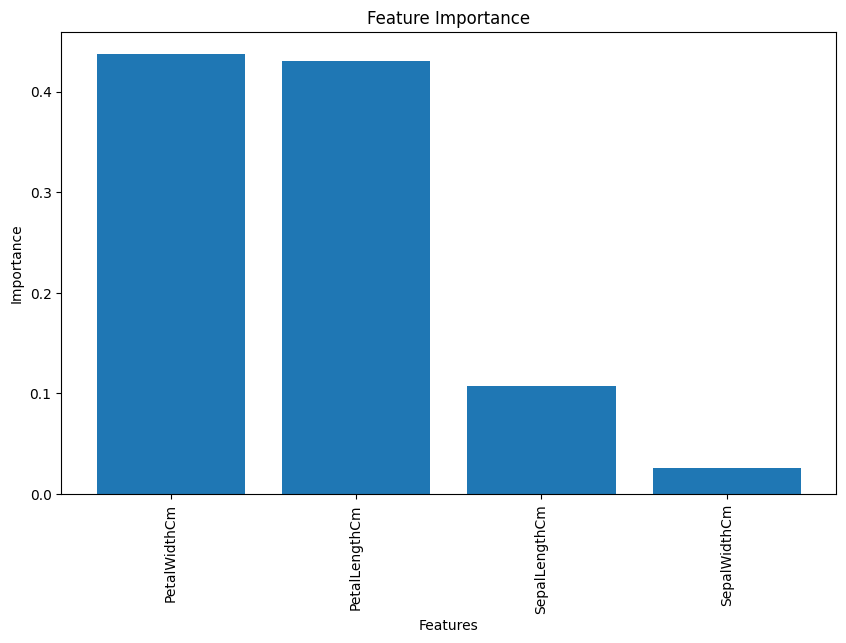

In [8]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

C:\Users\senya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
C:\Users\senya\AppData\Local\Temp\ipykernel_24140\3439268823.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_2d[idx, 0], X_train_2d[idx, 1], c=cmap_bold(i),
C:\Users\senya\AppData\Local\Programs\Python\Python312\Lib\site-packag

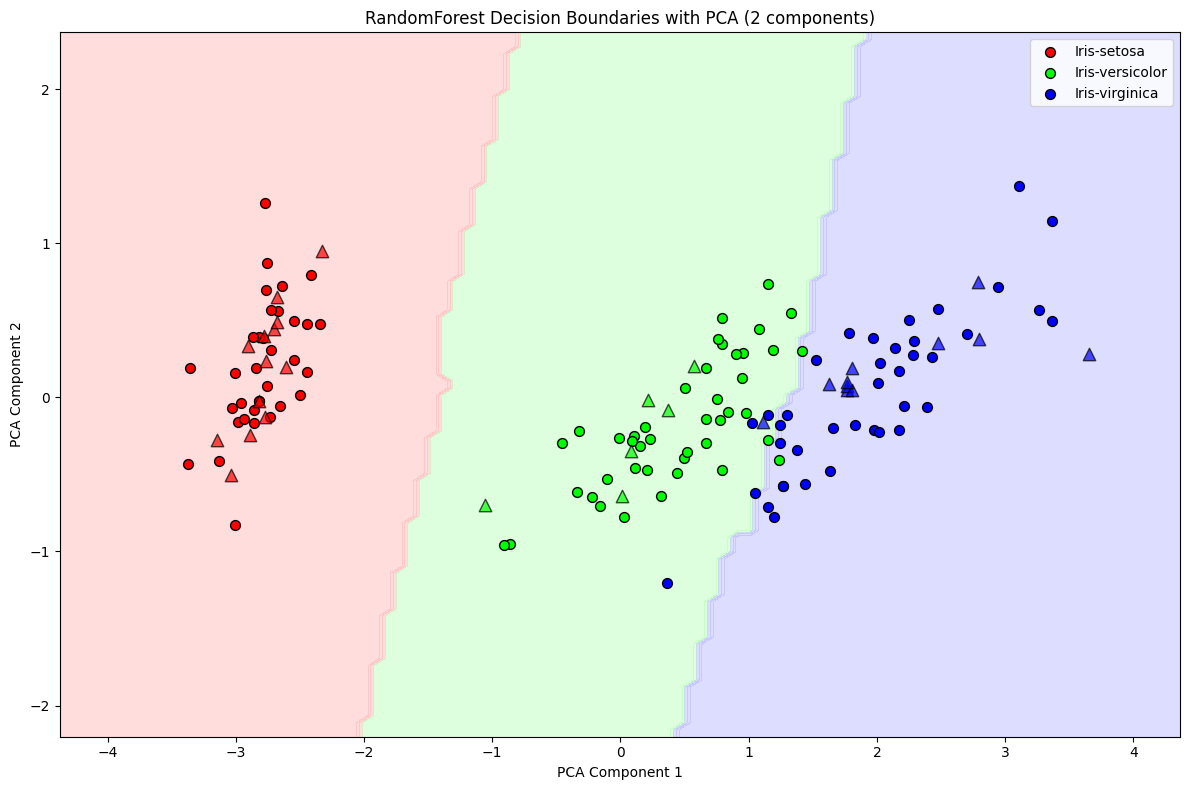

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, classification_report

# Assuming these variables exist from your previous code:
# X_train, X_test, y_train, y_test, model, y_pred

# First, encode the class labels using LabelEncoder
le = LabelEncoder()
le.fit(np.concatenate([y_train, y_test]))  # Fit on all labels to ensure all classes are encoded
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Create mesh grid for decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min()-1, X_train_2d[:, 0].max()+1, 100),
                     np.linspace(X_train_2d[:, 1].min()-1, X_train_2d[:, 1].max()+1, 100))

# Prepare grid points for prediction
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original = pca.inverse_transform(grid_points)

# Get predictions and reshape to match mesh grid
Z = model.predict(grid_points_original)
Z_numeric = le.transform(Z)
Z_numeric = Z_numeric.reshape(xx.shape)

# Define color maps for the plot
classes = np.unique(y_train)
n_classes = len(classes)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the decision boundary
plt.contourf(xx, yy, Z_numeric, alpha=0.4, cmap=cmap_light)

# Plot the training points
for i, c in enumerate(classes):
    idx = np.where(y_train == c)
    plt.scatter(X_train_2d[idx, 0], X_train_2d[idx, 1], c=cmap_bold(i), 
                edgecolor='k', s=50, label=f'{c}')

# Also plot the test points
X_test_2d = pca.transform(X_test)
for i, c in enumerate(classes):
    idx = np.where(y_test == c)
    plt.scatter(X_test_2d[idx, 0], X_test_2d[idx, 1], c=cmap_bold(i), 
                edgecolor='k', marker='^', s=80, alpha=0.7)

plt.title('RandomForest Decision Boundaries with PCA (2 components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



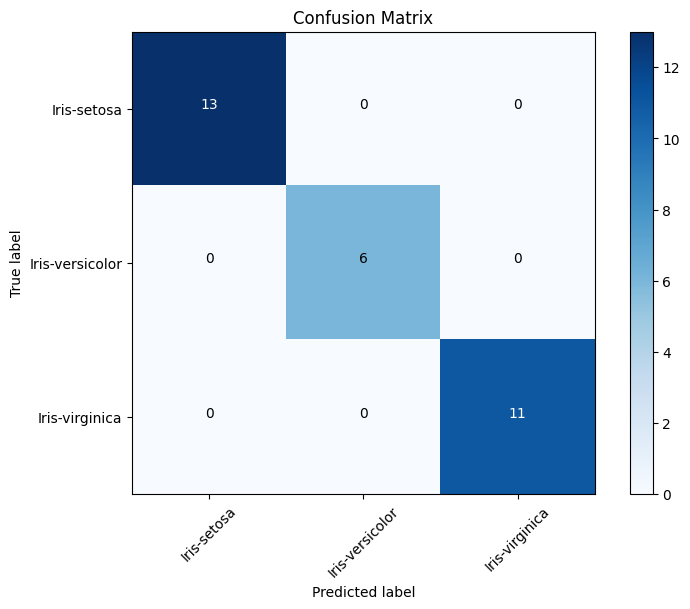

Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Matthews Correlation Coefficient: 1.0000


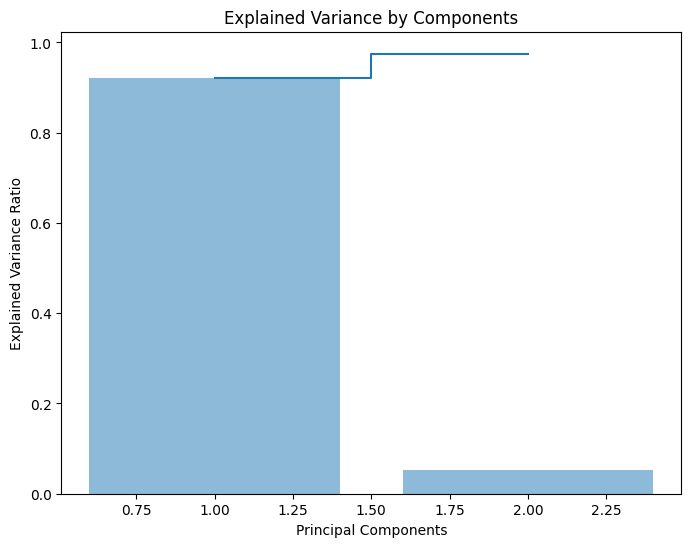

In [28]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations to the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Visualize the variance explained by PCA components
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Components')
plt.show()